#mengmeng wu
#data cleaning 
#decision tree and random forest model building
#model evalution

In [65]:
import pandas as pd
import numpy as np

In [66]:
df = pd.read_csv("final_merge_ca.csv") 

/var/folders/3y/pp5rq62s315dq6zz6hm6ywg40000gn/T/ipykernel_37331/3057298602.py:1: DtypeWarning: Columns (10,11,16,17,22,23,28,29,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,100,101,102,103,104,105,106,107,108,109,110,111,118,119,122,123,124,125,128,129,136,137,138,139,142,143,144,145,190,191,192,193,226,362,363,366,367,370,371,374,375,378,379,382,383,386,387,390,391,394,395,398,399,402,403,406,407,410,411,414,415,418,419,420,421,426,427,430,431,434,435,438,439,446,447,450,451,470,471,474,475,478,479,482,483,486,487,490,491,494,495,498,499,502,503,506,507,510,511,514,515,518,519,522,523,526,527,530,531,534,535,538,539,542,543,546,547,550,551,554,555,558,559,562,563,566,567,570,571,574,575,578,579,582,583,590,591,594,595,598,599,602,603,606,607,610,611,618,619,622,623,626,627,630,631,634,635,638,639,642,643,646,647,650,651,654,655,658,659,662,663,666,667,670,671,674,675) 

### data cleaning

In [67]:
df.shape

(2346, 683)

In [68]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'GEO_ID', 'NAME_x', 'S1501_C01_001E',
       'S1501_C01_001M', 'S1501_C02_001E', 'S1501_C02_001M', 'S1501_C03_001E',
       'S1501_C03_001M',
       ...
       'DP05_0080M', 'DP05_0080PE', 'DP05_0080PM', 'DP05_0081E', 'DP05_0081M',
       'DP05_0081PE', 'DP05_0081PM', 'Unnamed: 326', 'in_county', 'target'],
      dtype='object', length=683)

In [69]:
#select the variables we need
selected_columns = ['target',"S1501_C01_014E","S1903_C02_001E", "S1903_C02_002E", "S1903_C02_003E", "DP05_0032PE", "DP05_0033PE"]

In [70]:
#mapping colname using codebook
colname_dic = {"S1501_C01_014E": "highschool degree or higher rate", 
               "S1903_C02_001E": "household median income", 
               "S1903_C02_002E": "white household median income",
               "S1903_C02_003E": "black household median income",
               "DP05_0032PE": "white race rate",
               "DP05_0033PE": "black race rate",
               "target": "one or more homicides"
               }

In [71]:
df = df[selected_columns]

In [72]:
df.columns

Index(['target', 'S1501_C01_014E', 'S1903_C02_001E', 'S1903_C02_002E',
       'S1903_C02_003E', 'DP05_0032PE', 'DP05_0033PE'],
      dtype='object')

In [73]:
#check if there is missing values 
null_sum = df.isnull().sum()

null_sum

target            0
S1501_C01_014E    0
S1903_C02_001E    0
S1903_C02_002E    0
S1903_C02_003E    0
DP05_0032PE       0
DP05_0033PE       0
dtype: int64

In [74]:
df["S1501_C01_014E"].value_counts()

S1501_C01_014E
-        18
100.0    12
94.6     11
96.8     10
96.3      9
         ..
43.1      1
38.7      1
34.0      1
58.7      1
0.0       1
Name: count, Length: 1020, dtype: int64

In [76]:
#replace dash with missing value
df.replace('-', np.nan, inplace=True)

In [77]:
df.isna().sum()

target              0
S1501_C01_014E     18
S1903_C02_001E     34
S1903_C02_002E     40
S1903_C02_003E    941
DP05_0032PE        17
DP05_0033PE        17
dtype: int64

In [78]:
x_variable = ["S1501_C01_014E","S1903_C02_001E", "S1903_C02_002E", "S1903_C02_003E", "DP05_0032PE", "DP05_0033PE"]

In [79]:
#remove the str expressions before changing data type
for x in x_variable:
    df[x] = df[x].replace({
        ',': '',
        r'\-$': '',
        r'\+$': ''
    }, regex=True)


In [80]:
df.isna().sum()

target              0
S1501_C01_014E     18
S1903_C02_001E     34
S1903_C02_002E     40
S1903_C02_003E    941
DP05_0032PE        17
DP05_0033PE        17
dtype: int64

In [81]:
df["S1501_C01_014E"].value_counts()

S1501_C01_014E
100.0    12
94.6     11
96.8     10
94.8      9
95.9      9
         ..
43.1      1
38.7      1
34.0      1
58.7      1
0.0       1
Name: count, Length: 1019, dtype: int64

In [82]:
#convert the data type to numerical value
df[selected_columns] = df[selected_columns].astype('float')
df2 = df.copy()


In [83]:
#replace missing value in x using mean
for col in x_variable:  
    df[col].fillna(value = df[col].mean(), inplace=True)

/var/folders/3y/pp5rq62s315dq6zz6hm6ywg40000gn/T/ipykernel_37331/1433626373.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value = df[col].mean(), inplace=True)


In [84]:
#drop missing value in x 
df2 = df2.dropna(subset=x_variable)

In [85]:
#check target value distribution
print(df['target'].value_counts())
print(df2['target'].value_counts())

target
0.0    1944
1.0     402
Name: count, dtype: int64
target
0.0    1131
1.0     271
Name: count, dtype: int64


we can see there is a large data imbalance with case 0 almost five times of case 1. We will further tackle this issue in the model building part.

In [86]:
#rename the column name
df.rename(columns=colname_dic, inplace=True)
df2.rename(columns=colname_dic, inplace=True)
x_variables = [col for col in df.columns if col != 'one or more homicides']

<Axes: xlabel='household median income', ylabel='Count'>

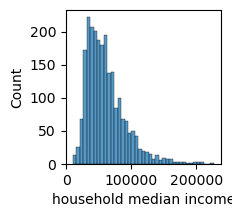

In [87]:
#data transformation
#check data distribution
import seaborn as sns
sns.histplot(df['household median income'])

some of the variables do not strictly follow the normal distribution. therefore, we choose minmax scaler to do data standardization

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df[x_variables] = scaler.fit_transform(df[x_variables])

### model training

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
# packages for machine learning 
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz 

# packages for plot and visualization
import matplotlib.pyplot as plt
from matplotlib import pylab
import graphviz 
pylab.rcParams["figure.figsize"] = (2.0, 2.0)
%matplotlib inline

In [179]:
X = df[[col for col in df.columns if col != 'one or more homicides']]
y = df["one or more homicides"]

In [180]:
# split the data into training and testing set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=929) 

In [181]:
# Create a DecisionTreeClassifier object.  
# 1. explore the base model fisrt. set criterion = "entropy" and random_state =929, and keep all the other parameters with the default value.
dt_clf1 = DecisionTreeClassifier(random_state=929,criterion='entropy') 

In [182]:
dt_clf1 = dt_clf1.fit(X_train1, y_train1)

In [183]:
from sklearn.model_selection import KFold, cross_validate 

In [184]:
# 2. Evaluate the DecisionTreeClassifier performance using kfolder
# Perform KFold splitting

kf = KFold(n_splits=5, shuffle=True, random_state=929)
scores = cross_validate(dt_clf1, X_train1, y_train1, cv=kf,
                       scoring=['accuracy', 'precision', 'recall'])


print("Accuracy scores: ", scores['test_accuracy'])
print("Precision scores: ", scores['test_precision'])
print("Recall scores: ", scores['test_recall'])

print("Mean Accuracy: ", scores['test_accuracy'].mean())
print("Mean Precision: ", scores['test_precision'].mean())
print("Mean Recall: ", scores['test_recall'].mean())

Accuracy scores:  [0.69946809 0.70666667 0.74933333 0.728      0.688     ]
Precision scores:  [0.12903226 0.19736842 0.25       0.16       0.20512821]
Recall scores:  [0.11940299 0.234375   0.28333333 0.23529412 0.22535211]
Mean Accuracy:  0.7142936170212766
Mean Precision:  0.18830577684907057
Mean Recall:  0.21955150974621507


3.1 through validation, the first model we explore should be improved on the precision and recall score for case 1. The low scores are likely due to the data imblance. So we are 1/4 from the x value data in the original data for training

In [185]:
X_zeros = X_train1[y_train1 == 0]
y_zeros = y_train1[y_train1 == 0]
X_ones = X_train1[y_train1 == 1]
y_ones = y_train1[y_train1 == 1]

X_zeros_sampled = X_zeros.sample(n=len(X_zeros) // 4, random_state=929)
y_zeros_sampled = y_zeros[X_zeros_sampled.index]

X_train2= pd.concat([X_zeros_sampled, X_ones])
y_train2 = pd.concat([y_zeros_sampled, y_ones])


In [186]:
X_train2.shape

(703, 6)

In [190]:
pd.DataFrame([np.round(dt_clf1.feature_importances_,2)], columns= x_variables)

,highschool degree or higher rate,household median income,white household median income,black household median income,white race rate,black race rate
0,0.2,0.17,0.15,0.11,0.19,0.19


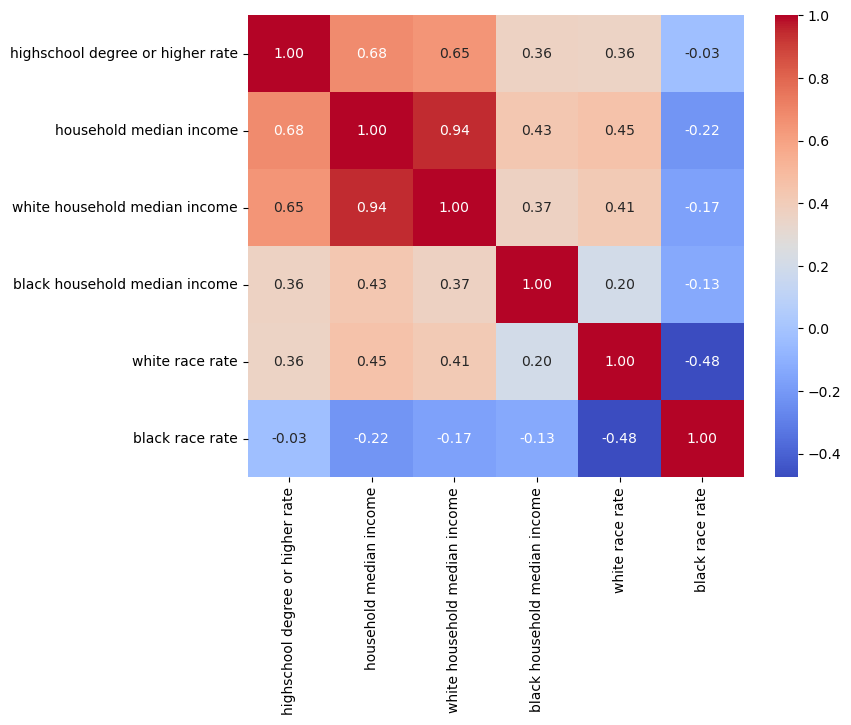

In [123]:
corr_matrix = df[x_variables].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

3.2 based on the feature importance and multicollinearity， I further filtered out two features

In [191]:

x_variables = ['highschool degree or higher rate', 'white household median income',
              'white race rate', 'black race rate']

In [192]:
df_update = df[x_variables + ['one or more homicides']]

In [193]:
X_train2 = X_train2[x_variables]

In [194]:
#check model complexity
dt_clf1.get_n_leaves()

306

In [195]:
dt_clf1.get_depth()

30

In [196]:
dt_clf1.tree_.n_node_samples

array([1876,  984,  926,   15,    4,   11,    6,    5,    2,    3,    1,
          2,  911,  779,  162,   14,    5,    9,    3,    6,    3,    3,
          2,    1,  148,  124,    5,    2,    3,  119,   48,    7,    6,
          1,   41,   71,   70,    1,   69,   27,   42,   30,   23,    6,
         17,    1,   16,   11,    8,    4,    2,    2,    4,    3,    5,
          7,   12,    1,   24,    2,   22,    6,   16,    2,   14,    1,
         13,    4,    1,    3,    2,    1,    9,  617,   11,    8,    3,
          2,    1,    5,    3,  606,   20,   18,    2,    1,    1,  586,
          6,    1,    5,    4,    1,  580,   17,    4,   13,    5,    1,
          4,    8,    7,    1,  563,   13,  550,  244,  215,  127,  124,
         66,   58,   45,   42,   29,    7,   22,   20,   15,    1,   14,
          5,    2,    3,    2,    1,    2,   13,    3,    2,    1,   13,
          8,    5,    3,   58,   35,   24,   18,    4,   14,    6,    8,
          2,    6,    5,    1,    6,   11,   23,   

In [197]:
#3.3 considering the model complexity, it may risk overfitting. so we then tune parameters using gridSearchCV
dt_clf2 = DecisionTreeClassifier(random_state=929,criterion='entropy', max_depth = 15, max_features = 4) 

In [198]:
from sklearn.model_selection import GridSearchCV
dt_clf2 = DecisionTreeClassifier(random_state=929)

param_grid = {
    'max_depth': [5, 10, 15, 20,25,30],
    'max_features': [3,4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_cv = GridSearchCV(estimator=dt_clf2, param_grid=param_grid, cv=5,
                           scoring={
                            'precision': 'precision',
                            'recall': 'recall',
                            'accuracy': 'accuracy'
                            },
                            refit='accuracy')

grid_cv.fit(X_train2, y_train2)
# Print the accuracy of Decision Tree Classifier
print("Best parameters found: ", grid_cv.best_params_)
print("Best score achieved: ", grid_cv.best_score_)

print("\nDetailed cross-validation results:")
for params, mean_accuracy, mean_precision, mean_recall in zip(
    grid_cv.cv_results_['params'],
    grid_cv.cv_results_['mean_test_accuracy'],
    grid_cv.cv_results_['mean_test_precision'],
    grid_cv.cv_results_['mean_test_recall']
):
    print(f"\nParameters: {params}")
    print(f"Accuracy: {mean_accuracy:.3f}")
    print(f"Precision: {mean_precision:.3f}")
    print(f"Recall: {mean_recall:.3f}")

Best parameters found:  {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score achieved:  0.540547112462006

Detailed cross-validation results:

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.539
Precision: 0.480
Recall: 0.473

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.536
Precision: 0.475
Recall: 0.457

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.538
Precision: 0.471
Recall: 0.444

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.541
Precision: 0.480
Recall: 0.460

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy: 0.538
Precision: 0.477
Recall: 0.457

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accu

In [199]:
feature_importances = grid_cv.best_estimator_.feature_importances_

importance_df = pd.DataFrame(
    [np.round(feature_importances, 2)], 
    columns=x_variables
)

print(importance_df)

   highschool degree or higher rate  white household median income  \
0                              0.18                            0.3   

   white race rate  black race rate  
0             0.31             0.21  


In [200]:
#random forest
from sklearn.ensemble import RandomForestClassifier
dt_clf3 = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 929,class_weight='balanced',max_depth = 20)

In [201]:
rf_clf = RandomForestClassifier(random_state=929)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15, 20],
    'max_features': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    estimator=rf_clf, 
    param_grid=rf_param_grid, 
    cv=5,
    scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'accuracy': 'accuracy'
},
    refit='accuracy')

rf_grid.fit(X_train2, y_train2)

print("Best parameters found: ", rf_grid.best_params_)
print("Best score achieved: ", rf_grid.best_score_)

print("\nDetailed cross-validation results:")
for params, mean_accuracy, mean_precision, mean_recall in zip(
    rf_grid.cv_results_['params'],
    rf_grid.cv_results_['mean_test_accuracy'],
    rf_grid.cv_results_['mean_test_precision'],
    rf_grid.cv_results_['mean_test_recall']
):
    print(f"\nParameters: {params}")
    print(f"Accuracy: {mean_accuracy:.3f}")
    print(f"Precision: {mean_precision:.3f}")
    print(f"Recall: {mean_recall:.3f}")

Best parameters found:  {'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score achieved:  0.5704559270516718

Detailed cross-validation results:

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.562
Precision: 0.505
Recall: 0.415

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.563
Precision: 0.508
Recall: 0.409

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.563
Precision: 0.508
Recall: 0.406

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.563
Precision: 0.506
Recall: 0.412

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.566
Precis

### model evaluation

In [53]:
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
y_pred = dt_clf1.predict(X_test1)
y_true = y_test1
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82       381
         1.0       0.24      0.26      0.25        89

    accuracy                           0.71       470
   macro avg       0.53      0.54      0.54       470
weighted avg       0.71      0.71      0.71       470



model1: we can see although it has a high accuracy, the precision and recall for case 1 is very low. this indicates it can accurately predict for case 0 but due to data imbalance, has low predicting ability for case y.

In [207]:
X_test2 = X_test1[x_variables]

In [208]:
y_pred = grid_cv.predict(X_test2)
y_true = y_test1

In [209]:
y_prob = grid_cv.predict_proba(X_test2)
y_prob

array([[0.4375    , 0.5625    ],
       [0.68145161, 0.31854839],
       [0.4375    , 0.5625    ],
       [0.68145161, 0.31854839],
       [0.68145161, 0.31854839],
       [0.68145161, 0.31854839],
       [0.68145161, 0.31854839],
       [0.4375    , 0.5625    ],
       [0.68145161, 0.31854839],
       [0.68145161, 0.31854839],
       [0.50819672, 0.49180328],
       [0.68145161, 0.31854839],
       [0.68145161, 0.31854839],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.68145161, 0.31854839],
       [0.33333333, 0.66666667],
       [0.68145161, 0.31854839],
       [0.4375    , 0.5625    ],
       [0.4375    , 0.5625    ],
       [0.50819672, 0.49180328],
       [0.68145161, 0.31854839],
       [0.68145161, 0.31854839],
       [0.71428571, 0.28571429],
       [0.4375    , 0.5625    ],
       [0.4375    , 0.5625    ],
       [0.68145161, 0.31854839],
       [0.68145161, 0.31854839],
       [0.68145161, 0.31854839],
       [0.71428571, 0.28571429],
       [1.

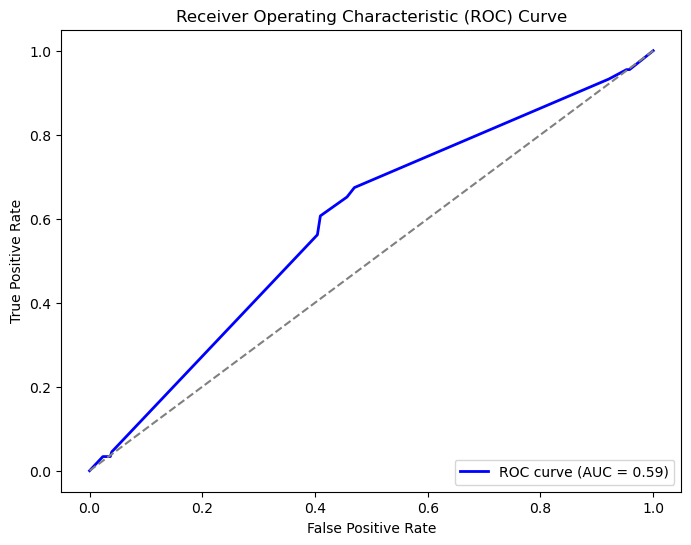

In [214]:
from sklearn.metrics import roc_curve, auc
# Predict probabilities instead of labels
y_prob = grid_cv.predict_proba(X_test2)[:, 1]  # Get probabilities for class 1

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

from the roc curve, we can see that the threhold around 0.4-0.5 makes the best classification, so we can use the default threshold 0.5 to split the probability.

In [215]:
confusion_matrix(y_true, y_pred,labels=[0,1])

array([[227, 154],
       [ 39,  50]])

In [216]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.60      0.70       381
         1.0       0.25      0.56      0.34        89

    accuracy                           0.59       470
   macro avg       0.55      0.58      0.52       470
weighted avg       0.74      0.59      0.63       470



from the model two, we can see that the accuracy reduces but the precision and recall for case 1 raise. This is becuase we fix the data imbalance by undersampling for case y=0. However, in this we, we also sacrifice our data sample for training, which might influence the accuracy.

In [217]:
y_pred = rf_grid.predict(X_test2)
y_true = y_test1
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.69      0.76       381
         1.0       0.26      0.46      0.33        89

    accuracy                           0.65       470
   macro avg       0.55      0.58      0.55       470
weighted avg       0.74      0.65      0.68       470



from the model three, we see it has the highest precision and recall for case 1. It also raises accuracy from model2. this is becuase random forest can avoid the issue of overfitting by introducing noise in data training, which give a better performance in predicting new data.